In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
import xarray as xr

import glob

In [2]:
# open PCM-Mars output file
data_dir = '/glade/u/home/marsh/scratch/LMD/LMD_MARS_r2801_Mg_17Oct2022/'
ds = xr.open_dataset(data_dir+'LMD_MARS_r2801_Mg_17Oct2022_diagfi_MY32_01.nc', decode_times=False)

In [3]:
ds

<xarray.Dataset>
Dimensions:              (index: 100, latitude: 49, longitude: 65, altitude: 49, interlayer: 50, subsurface_layers: 18)
Coordinates:
  * latitude             (latitude) float64 90.0 86.25 82.5 ... -86.25 -90.0
  * longitude            (longitude) float64 -180.0 -174.4 ... 174.4 180.0
  * altitude             (altitude) float64 0.004481 0.02354 ... 234.3 241.3
Dimensions without coordinates: index, interlayer, subsurface_layers
Data variables: (12/254)
    Time                 float32 ...
    controle             (index) float64 ...
    aps                  (altitude) float32 ...
    bps                  (altitude) float32 ...
    ap                   (interlayer) float32 ...
    bp                   (interlayer) float32 ...
    ...                   ...
    PhiH2                float32 ...
    PhiD                 float32 ...
    zmax_th              (latitude, longitude) float32 ...
    hfmax_th             (latitude, longitude) float32 ...
    wstar                (latitude, longitude) float32 ...
    co2conservation      float32 ...
Attributes:
    history:  Wed Nov 30 21:46:31 2022: ncwa -O -a Time /resstore/b0154/Data/...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [4]:
# extract PS, T, U and V and calculate the zonal meanst = ds.temp.mean(dim=['longitude','Time']) # temperature (K)

ps = ds.ps.mean(dim='longitude')
t = ds.temp.mean(dim='longitude') # temperature (K)
u = ds.u.mean(dim='longitude') # temperature (K)
v = ds.v.mean(dim='longitude') # temperature (K)

t.attrs = {'units': 'K'}
u.attrs = {'units': 'm/s'}
v.attrs = {'units': 'm/s'}

# extract hbrid sigma-pressure coordinates
aps = ds.aps # hybrid pressure at midlayers
bps = ds.bps # hybrid sigma at midlayers

zkm = ds.altitude # pseudo_altitude (km)

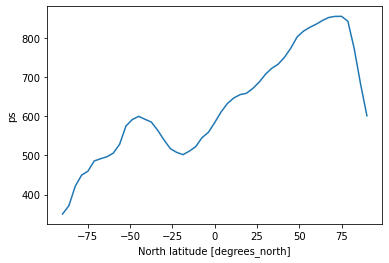

In [5]:
ps.plot()

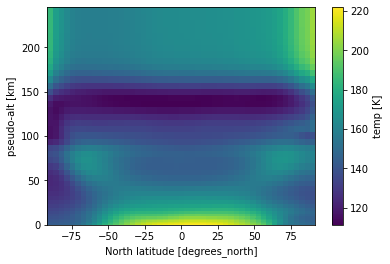

In [6]:
t.plot()

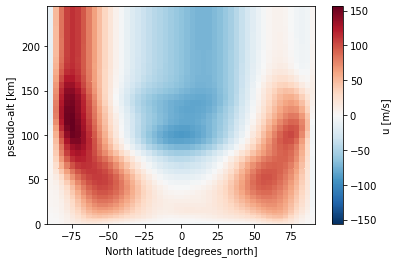

In [7]:
u.plot()

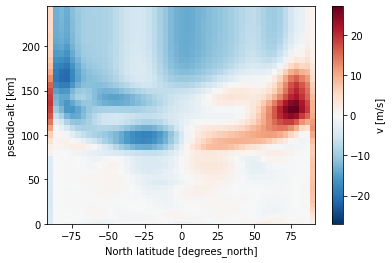

In [8]:
v.plot()

In [9]:
ds_out = xr.Dataset(dict(ps=ps, t=t, u=u, v=v, alt=zkm, aps=aps, bps=bps)) 